## cable theft data exploration

In [1]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_theme(style="darkgrid")
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import datetime as dt
import plotly.express as px

#### load data

In [3]:
cable_theft_df = pd.read_csv("/home/jupyter/projects/cable-theft/data/cable_theft.csv")

In [4]:
cable_theft_df.columns

Index(['SIR Number', 'Year', 'Month', 'Day', 'Hour', 'DoW', 'Reported Date',
       'FY', 'Week ', 'Exchange', 'Exch hits', 'CSS DB', 'NED1',
       'Damage Est Nu', 'Postcode', 'Address', 'Information about Incident',
       'Location Details', 'Cut/ Theft', 'Cable  Size   TOTAL  pairs ONLY',
       'Live pairs', 'Total Length metres', 'Cable affected details',
       'E side, D side, Fibre', 'Police Force', 'Police Reference Number',
       'N#I#O's Name /\nOp Name', 'County', 'region', 'Cable size',
       'Indicative copper worth based on current UK copper price',
       'cost (raptor)',
       'Incident form rerturned or response received in X days', 'Hrs claimed',
       'Costs (excl MHours)', 'Manhour Cost', 'Total Cost',
       'Flagged to insurance', 'Hrs claimed on NJR', '#', 'Est Number', 'PIA',
       'NOTES ', 'date 3', 'date mmm yy', 'Repeat Hit',
       'Cable anchors in this Fin Year'],
      dtype='object')

In [5]:
cable_theft_df.head()

,SIR Number,Year,Month,Day,Hour,DoW,Reported Date,FY,Week,Exchange,Exch hits,CSS DB,NED1,Damage Est Nu,Postcode,Address,Information about Incident,Location Details,Cut/ Theft,Cable Size TOTAL pairs ONLY,Live pairs,Total Length metres,Cable affected details,"E side, D side, Fibre",Police Force,Police Reference Number,N#I#O's Name /\nOp Name,County,region,Cable size,Indicative copper worth based on current UK copper price,cost (raptor),Incident form rerturned or response received in X days,Hrs claimed,Costs (excl MHours),Manhour Cost,Total Cost,Flagged to insurance,Hrs claimed on NJR,#,Est Number,PIA,NOTES,date 3,date mmm yy,Repeat Hit,Cable anchors in this Fin Year
0,11009105,2001,11,9,0,Fri,37204.0,2001-2002,32,Adlington,2,LC,NN-NORTHWESTEAST,NaN,PR6 9NA,"Bolton Road, Adlington, Chorley",Report states that cables were cut to facilita...,NaN,Cut,20.0,20.0,0,NaN,d,Lancashire Constabulary,NaN,NaN,North West,Preston,< 100 pr,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,09/11/01,2001 Wk: 32,1,0
1,11005559,2002,8,16,0,Fri,37484.0,2002-2003,20,Horsham,9,SD,NL-WESTDOWNS,NaN,RH12 3RR,"Robin Hood Lane, Warnham, Horsham",Snare alarm activated and Police attended. Evi...,NaN,Cut,1700.0,1700.0,0,NaN,e,Surrey Police,NaN,NaN,South East,Redhill,NaN,NaN,-,Not Sent,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,16/08/02,2002 Wk: 20,1,0
2,11005565,2002,8,16,0,Fri,37484.0,2002-2003,20,Downton,4,ST,NX-AVONWILTS,NaN,SP5 3HN,"Breamore Road, Downton, Salisbury",NaN,NaN,Theft,600.0,600.0,0,NaN,e,Wiltshire Police,NaN,NaN,South West,Salisbury,NaN,NaN,-,Not Sent,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,16/08/02,2002 Wk: 20,1,0
3,7000132,2007,4,3,0,Tue,39175.0,2007-2008,1,Wrexham,4,WN,NW-CHESTERMERSEYSIDE,NaN,LL14 6PY,"Ruabon Road, Ruabon",Call to report two males seen in a white Renau...,NaN,Intelligence,NaN,NaN,0,NaN,d,North Wales Police,NaN,NaN,Wales,Llandudno,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,03/04/07,2007 Wk: 1,1,0
4,7000158,2007,4,4,0,Wed,39176.0,2007-2008,1,Collyhurst,142,MR,NN-NORTHWESTWEST,NaN,M9 5RP,"Oakridge Walk,",Operation Eiger: The caller is reporting damag...,NaN,Theft,NaN,NaN,0,NaN,e,Greater Manchester Police,NaN,NaN,North West,Manchester,NaN,NaN,-,Not Sent,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,04/04/07,2007 Wk: 1,60,0


#### create incident date

In [6]:
cable_theft_df['incident_dt'] = pd.to_datetime(dict(year=cable_theft_df.Year, month=cable_theft_df.Month, day=cable_theft_df.Day))

#### create incident day of week

In [7]:
cable_theft_df['day_of_week'] = cable_theft_df['incident_dt'].dt.dayofweek
days = {0:'0: Mon',1:'1: Tues',2:'2: Weds',3:'3: Thurs',4:'4: Fri',5:'5: Sat',6:'6: Sun'}

cable_theft_df['day_of_week'] = cable_theft_df['day_of_week'].apply(lambda x: days[x])

#### theft indicator

In [8]:
cable_theft_df['type'] = cable_theft_df['Cut/ Theft'].str.lower().str.strip()

#### Recorded incidents by financial year

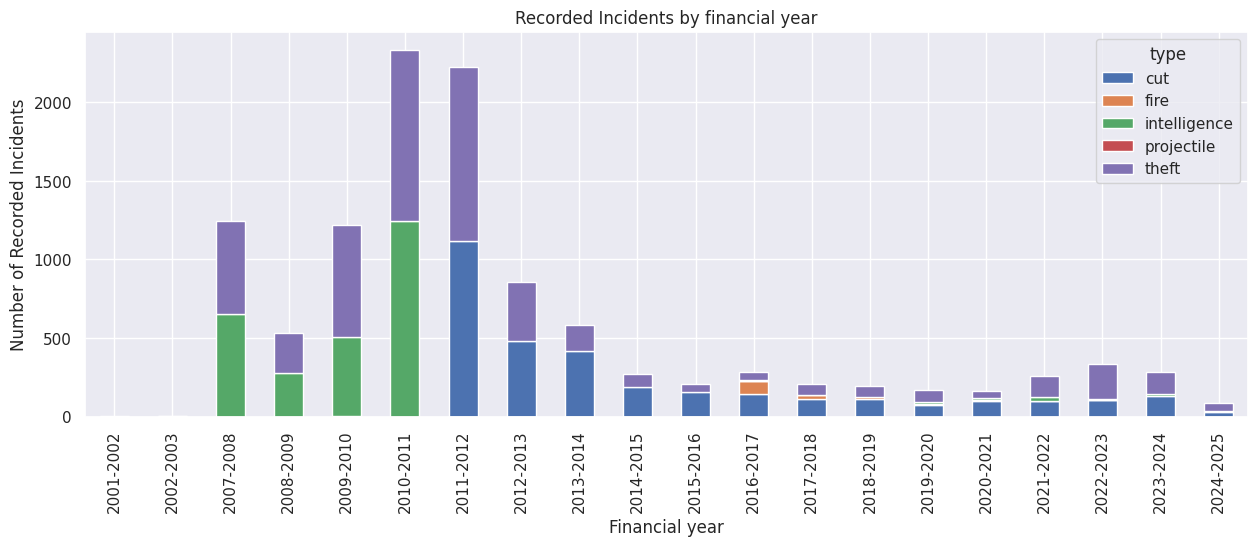

In [9]:
cable_theft_summary_df = cable_theft_df[['SIR Number','FY','type']].groupby(by=['FY','type']).size().unstack(fill_value=0)
cable_theft_summary_df#.columns = cable_theft_summary_df.columns.droplevel(0)
cable_theft_summary_df.plot(kind='bar', stacked='true',figsize=(15, 5))
plt.title("Recorded Incidents by financial year")
plt.xlabel("Financial year")
plt.ylabel("Number of Recorded Incidents")
plt.show()

In [10]:
cable_theft_summary_df.transpose()

FY,2001-2002,2002-2003,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025
type,,,,,,,,,,,,,,,,,,,,
cut,1,1,0,0,1,0,1115,479,417,186,158,143,114,114,75,100,97,105,134,28
fire,0,0,0,0,0,0,0,0,0,0,0,83,22,8,5,7,4,1,0,0
intelligence,0,0,650,275,505,1247,0,0,0,0,0,1,1,0,12,13,23,3,11,8
projectile,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0
theft,0,1,592,254,711,1086,1111,376,168,86,51,56,70,74,78,41,136,228,137,53


#### incidents from 2020

In [11]:
cable_theft_2020_df = cable_theft_df[cable_theft_df['Year'] >= 2020]

#### incidents by month

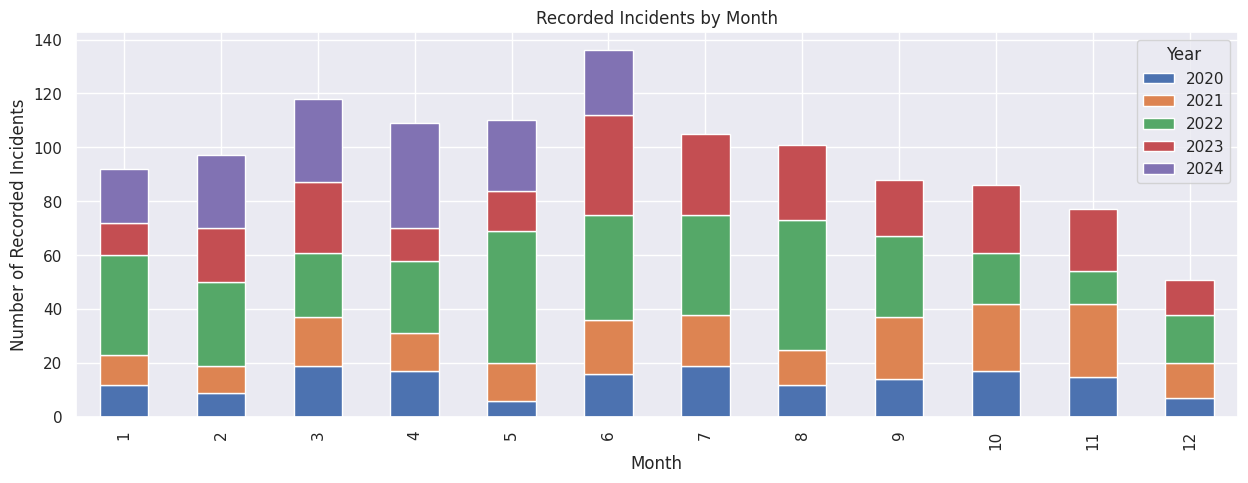

In [12]:
cable_theft_2020_df[['SIR Number','Month','Year']].groupby(['Month','Year']).size().unstack().plot(stacked=True,kind='bar',figsize=(15, 5))
plt.title("Recorded Incidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Recorded Incidents")
plt.show()

### incidents by ToD (time recorded from 31/8/2022)

In [13]:
date_start = dt.datetime(2022, 8, 31)
date_start

datetime.datetime(2022, 8, 31, 0, 0)

In [14]:
cable_theft_tod_df = cable_theft_df[cable_theft_df['incident_dt'] >= date_start]

In [15]:
cable_theft_tod_group_df = cable_theft_tod_df[['SIR Number' , 'Hour','type']].groupby(['Hour','type']).count().unstack(fill_value=0)
cable_theft_tod_group_df.columns = cable_theft_tod_group_df.columns.droplevel(0)
cable_theft_tod_group_df = cable_theft_tod_group_df / cable_theft_tod_group_df[['cut','intelligence','theft']].sum().sum()* 100

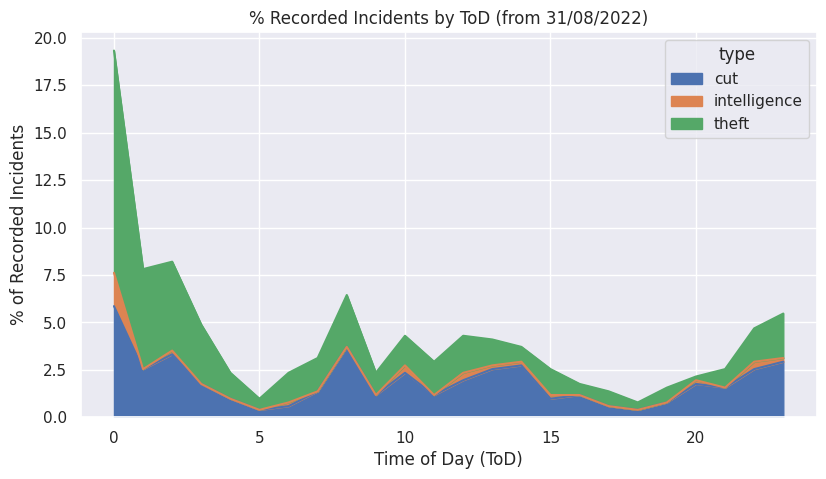

In [16]:
cable_theft_tod_group_df.plot(kind='area', stacked='false',figsize=(9.5, 5))
plt.title("% Recorded Incidents by ToD (from 31/08/2022)")
plt.xlabel("Time of Day (ToD)")
plt.ylabel("% of Recorded Incidents")
plt.show()

In [17]:
cable_theft_tod_group_df['total'] = cable_theft_tod_group_df[['cut','intelligence','theft']].sum(axis=1)
round(cable_theft_tod_group_df[['cut','intelligence','theft','total']].transpose(),1)

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
type,,,,,,,,,,,,,,,,,,,,,,,,
cut,5.9,2.5,3.3,1.8,1.0,0.4,0.6,1.4,3.7,1.2,2.3,1.2,2.0,2.5,2.7,1.0,1.2,0.6,0.4,0.8,1.8,1.6,2.5,2.9
intelligence,1.8,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.4,0.0,0.4,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.4,0.2
theft,11.7,5.3,4.7,3.1,1.4,0.6,1.6,1.8,2.7,1.2,1.6,1.8,2.0,1.4,0.8,1.4,0.6,0.8,0.4,0.8,0.2,1.0,1.8,2.3
total,19.3,7.8,8.2,4.9,2.3,1.0,2.3,3.1,6.4,2.3,4.3,2.9,4.3,4.1,3.7,2.5,1.8,1.4,0.8,1.6,2.1,2.5,4.7,5.5


#### Day of Week

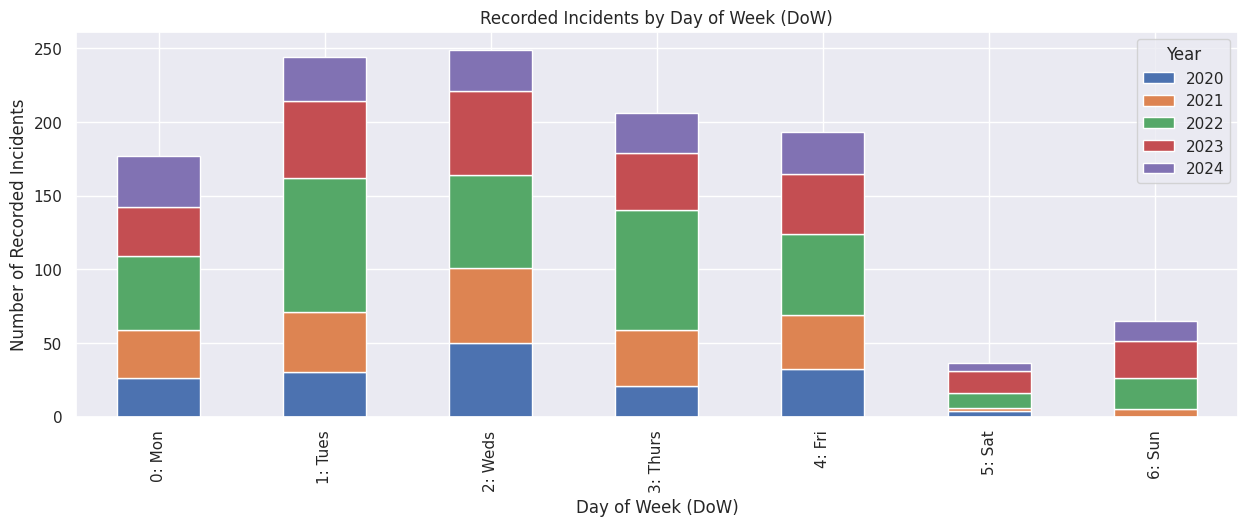

In [18]:
cable_theft_2020_df[['SIR Number','day_of_week','Year']].groupby(['day_of_week','Year']).size().unstack().plot(stacked=True,kind='bar',figsize=(15, 5))
plt.title("Recorded Incidents by Day of Week (DoW)")
plt.xlabel("Day of Week (DoW)")
plt.ylabel("Number of Recorded Incidents")
plt.show()

### Distribution of lengths & value

In [19]:
cable_theft_df.tail()

,SIR Number,Year,Month,Day,Hour,DoW,Reported Date,FY,Week,Exchange,Exch hits,CSS DB,NED1,Damage Est Nu,Postcode,Address,Information about Incident,Location Details,Cut/ Theft,Cable Size TOTAL pairs ONLY,Live pairs,Total Length metres,Cable affected details,"E side, D side, Fibre",Police Force,Police Reference Number,N#I#O's Name /\nOp Name,County,region,Cable size,Indicative copper worth based on current UK copper price,cost (raptor),Incident form rerturned or response received in X days,Hrs claimed,Costs (excl MHours),Manhour Cost,Total Cost,Flagged to insurance,Hrs claimed on NJR,#,Est Number,PIA,NOTES,date 3,date mmm yy,Repeat Hit,Cable anchors in this Fin Year,incident_dt,day_of_week,type
11455,24002787,2024,6,25,12,Tue,45468.50278,2024-2025,13,Blakeney,1,SS,NW-MARCHES,NaN,GL154AE,"A48 Blakeney, GL154AE\nW3W /// lasted.marker.wove","Cable Theft - Urban, two cables cut 150m of 20...",Residential,Theft,700.0,NaN,320,"Cables cut by duct mouth in man hole, now need...",e,Gloucestershire Constabulary,NaN,NaN,West Midlands,Gloucester,over 500pr,NaN,2361,Not returned,0,2361.0,0,2361.0,NaN,NaN,NaN,FBD49004,NaN,NaN,25/06/24,2024 Wk: 13,1,0,2024-06-25,1: Tues,theft
11456,24002810,2024,6,26,0,Wed,45469.00139,2024-2025,13,TILBURY,17,EA,NE-SOUTHANGLIA,NaN,RM18 8QX,Coopers Shaw Rd \nW3W /// tribe.singer.minute,"Cable Theft - Rural, 2x800pr and 1 x 400pr x 2...",Rural,Theft,1600.0,NaN,220,2x800pr 220m,e,Metropolitan Police Service,42/97538/24,NaN,London Greater,Romford,over 500pr,NaN,20013.4,Not returned,0,20013.4,0,20013.4,NaN,NaN,NaN,FBD42022,NaN,NaN,26/06/24,2024 Wk: 13,6,0,2024-06-26,2: Weds,theft
11457,24002824,2024,6,26,12,Wed,45469.50972,2024-2025,13,Canterbury,10,ND,NL-EASTDOWNS,NaN,Ct2 8LL,Somner close \nW3W /// verse.prefer.twin,"Cable Cut - Urban, Fibre cable\n\nPCP affected...",Residential,Cut,1.0,NaN,0,Fibre cable,f,Kent Police,46/96238/24,NaN,South East,Canterbury,fibre,NaN,-,OR Sec note N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26/06/24,2024 Wk: 13,4,0,2024-06-26,2: Weds,cut
11458,28002850,2024,6,27,0,Thu,45470.01042,2024-2025,13,Stanford le Hope,11,EA,NE-SOUTHANGLIA,NaN,SS17 0GJ,"Stanford Road, Stanford-le-Hope. SS17 0GJ\nW3W...","Cable Theft - Urban, 150metres of 800pr 0.63\n...",Residential,Theft,800.0,NaN,150,150metres of 800pr 0.63,e,NaN,42/98123/24 (storm ref: EP-20240627-0003),NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,27/06/24,2024 Wk: 13,2,0,2024-06-27,3: Thurs,theft
11459,24002851,2024,6,27,0,Thu,45470.03125,2024-2025,13,TILBURY,17,EA,NE-SOUTHANGLIA,NaN,RM18 8BE,Fort Road Tilbury RM18 8BE\nW3W /// cases.lamp...,"Cable Theft - Rural, 150metres 0f 800pr 0.63\n...",Rural,Theft,800.0,NaN,150,150metres 0f 800pr 0.63,e,NaN,46/270624 linked to Stanford le hope incident ...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,27/06/24,2024 Wk: 13,6,0,2024-06-27,3: Thurs,theft


In [20]:
# coerce cable length to numeric
cable_theft_2020_df['total_length_metres_per_incident'] = pd.to_numeric(cable_theft_2020_df['Total Length metres'], errors='coerce')

In [21]:
round(cable_theft_2020_df[['total_length_metres_per_incident','type']].groupby(by='type').describe(percentiles=[0.2,0.4,0.6,0.8]),1)

total_length_metres_per_incident                            \
                                        count   mean    std  min    20%   
type                                                                      
cut                                     479.0   21.6   81.8  0.0    0.0   
fire                                     13.0    3.8   13.9  0.0    0.0   
intelligence                             60.0   22.9   84.9  0.0    0.0   
projectile                                1.0    0.0    NaN  0.0    0.0   
theft                                   585.0  530.4  682.9  0.0  118.6   

                                                  
                40%    50%    60%    80%     max  
type                                              
cut             0.0    0.0    0.0    0.0   935.0  
fire            0.0    0.0    0.0    0.0    50.0  
intelligence    0.0    0.0    0.0    0.0   500.0  
projectile      0.0    0.0    0.0    0.0     0.0  
theft         250.0  300.0  400.0  800.0  5600.0

In [22]:
# coerce cable length to numeric
cable_theft_2020_df['total_cost_per_incident'] = pd.to_numeric(cable_theft_2020_df['Total Cost'], errors='coerce')

In [23]:
round(cable_theft_2020_df[['total_cost_per_incident','type']].groupby(by='type').describe(percentiles=[0.2,0.4,0.6,0.8]),1)

total_cost_per_incident                                    \
                               count     mean      std     min     20%   
type                                                                     
cut                            238.0  14513.3  23992.5     0.0  1405.0   
fire                             5.0  19717.5  21558.5     0.0    36.0   
intelligence                    36.0  10726.8  12725.2  1405.0  1405.0   
projectile                       0.0      NaN      NaN     NaN     NaN   
theft                          486.0  25126.6  36315.7     0.0  2255.5   

                                                           
                 40%      50%      60%      80%       max  
type                                                       
cut           3163.4   5396.8   8796.8  20441.7  177611.0  
fire          8895.5  14795.8  23139.9  38142.9   48090.6  
intelligence  5580.0   7281.2   8652.7  14875.0   62792.0  
projectile       NaN      NaN      NaN      NaN       NaN  
theft         9666.0  14938.6  19953.3  37533.0  332463.2

In [24]:
# % value above £20k
cable_theft_2020_df['total_cost_per_incident'][cable_theft_2020_df['total_cost_per_incident']>=20000].sum()/cable_theft_2020_df['total_cost_per_incident'].sum()

0.7955938465092856

In [25]:
# % of volume
cable_theft_2020_df['total_cost_per_incident'][cable_theft_2020_df['total_cost_per_incident']>=20000].count()/cable_theft_2020_df['total_cost_per_incident'].count()

0.3254901960784314